In [1]:
import osmnx as ox
import geopandas as gpd
import shapely
import folium
import webbrowser
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import cartopy.feature as cf
import os

In [2]:
# define paths
data_path = 'data'
output_path = 'output'

# set parent folder as working directory
os.chdir('..')
os.getcwd()

'c:\\Users\\isaldiviagonzatti\\Downloads\\gitFiles\\MScThesisCode\\FLP'

In [3]:
PAL = os.path.join(data_path,'pineapple2019.json')
pineFields = gpd.read_file(PAL)

In [4]:
pineFields.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Get centroid of polygons in lat lon 
pineFields['centroid'] = pineFields['geometry'].centroid.to_crs(epsg=4326) 
# Divide by 10**6 to get area in km^2
pineFields["areakm2"] = pineFields['geometry'].area/ 10**6
pineFields.head()

,id,objectid,clase,area_ha,region,año,geometry,centroid,areakm2
0,Piña_2019.1,1,Piña,6.862816,Huetar Norte,2019,MULTIPOLYGON Z (((487784.273 1158470.523 0.000...,POINT (-84.11202 10.47607),0.068628
1,Piña_2019.2,3,Piña,3.215977,Huetar Norte,2019,MULTIPOLYGON Z (((481537.980 1155509.112 0.000...,POINT (-84.16834 10.45080),0.032160
2,Piña_2019.3,5,Piña,2.313386,Huetar Norte,2019,MULTIPOLYGON Z (((469979.578 1154391.714 0.000...,POINT (-84.27499 10.44014),0.023134
3,Piña_2019.4,6,Piña,2.758887,Huetar Norte,2019,MULTIPOLYGON Z (((481993.767 1155861.578 0.000...,POINT (-84.16500 10.45305),0.027589
4,Piña_2019.5,7,Piña,1.342576,Huetar Norte,2019,MULTIPOLYGON Z (((469078.304 1158708.839 0.000...,POINT (-84.28323 10.47903),0.013426


In [6]:
#To make sure area is calculated correctly, we convert EPSG to CEA format (6933). This time we convert to hectare
pineFields = pineFields.to_crs(epsg=6933)

In [7]:
pineFields["areaHa"] = pineFields['geometry'].area/ 10**6 *100

In [8]:
pineFields.head()

,id,objectid,clase,area_ha,region,año,geometry,centroid,areakm2,areaHa
0,Piña_2019.1,1,Piña,6.862816,Huetar Norte,2019,MULTIPOLYGON Z (((-8115614.929 1329309.945 0.0...,POINT (-84.11202 10.47607),0.068628,6.864177
1,Piña_2019.2,3,Piña,3.215977,Huetar Norte,2019,MULTIPOLYGON Z (((-8121119.224 1325946.230 0.0...,POINT (-84.16834 10.45080),0.032160,3.216594
2,Piña_2019.3,5,Piña,2.313386,Huetar Norte,2019,MULTIPOLYGON Z (((-8131305.411 1324668.954 0.0...,POINT (-84.27499 10.44014),0.023134,2.313799
3,Piña_2019.4,6,Piña,2.758887,Huetar Norte,2019,MULTIPOLYGON Z (((-8120717.676 1326346.490 0.0...,POINT (-84.16500 10.45305),0.027589,2.759417
4,Piña_2019.5,7,Piña,1.342576,Huetar Norte,2019,MULTIPOLYGON Z (((-8132103.131 1329567.076 0.0...,POINT (-84.28323 10.47903),0.013426,1.342814


In [9]:
pineFields = pineFields.to_crs(epsg=4326)

65,000 is the average qty of pineapple plants per hectare. From one hectare of 65k plants, we get 164 tonnes of USEABLE leaves.

Then,

In [10]:
pineFields['leavesTonne']=pineFields['areaHa']*164

In [11]:
print("There's " + str(round(pineFields['areaHa'].sum())) + " hectares of pineapple fields in Costa Rica.")

print("And there's a production of " + str(round(pineFields['leavesTonne'].sum()/2)) + " tonnes of pineapple leaves per year (assuming new planting every other year).")

There's 65451 hectares of pineapple fields in Costa Rica.
And there's a production of 5366960 tonnes of pineapple leaves per year (assuming new planting every other year).


In [12]:
pineFields.head()

,id,objectid,clase,area_ha,region,año,geometry,centroid,areakm2,areaHa,leavesTonne
0,Piña_2019.1,1,Piña,6.862816,Huetar Norte,2019,"MULTIPOLYGON Z (((-84.11160 10.47672 0.00000, ...",POINT (-84.11202 10.47607),0.068628,6.864177,1125.725048
1,Piña_2019.2,3,Piña,3.215977,Huetar Norte,2019,"MULTIPOLYGON Z (((-84.16864 10.44992 0.00000, ...",POINT (-84.16834 10.45080),0.032160,3.216594,527.521405
2,Piña_2019.3,5,Piña,2.313386,Huetar Norte,2019,"MULTIPOLYGON Z (((-84.27421 10.43974 0.00000, ...",POINT (-84.27499 10.44014),0.023134,2.313799,379.462995
3,Piña_2019.4,6,Piña,2.758887,Huetar Norte,2019,"MULTIPOLYGON Z (((-84.16448 10.45311 0.00000, ...",POINT (-84.16500 10.45305),0.027589,2.759417,452.544423
4,Piña_2019.5,7,Piña,1.342576,Huetar Norte,2019,"MULTIPOLYGON Z (((-84.28248 10.47877 0.00000, ...",POINT (-84.28323 10.47903),0.013426,1.342814,220.221516


<AxesSubplot: >

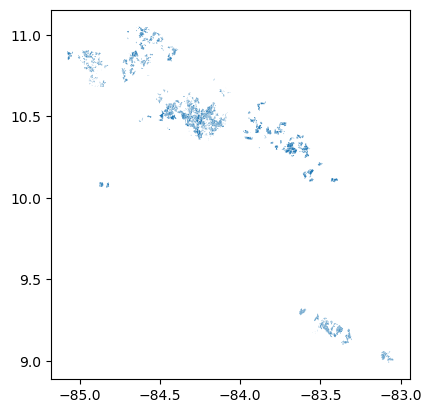

In [13]:
pineFields.plot()

As we can see, there's a a big cluster of production in the north-east side of the country, a small production in the west, and some production in the south. Let's see what proportion of the total production they represent:

In [14]:
# min and max coordinates across all geometries
pineFields.total_bounds

array([-85.07811394,   8.99082106, -83.04550169,  11.05205889])

In [15]:
westPine = pineFields.cx[-85.07811394:-84.5, 9.5:10.3]

print("There's " + str(round(westPine['areaHa'].sum())) + " hectares of pineapple fields clustered in the west of Costa Rica, especifically in Judas, Puntarenas Province." 
      + " This totals "  + str(round(westPine['leavesTonne'].sum()/2)) + " tonnes of pineapple leaves per year, which is " 
      + str(round(westPine['leavesTonne'].sum()/pineFields['leavesTonne'].sum()*100, 2)) + "% of the total in the country.")

There's 870 hectares of pineapple fields clustered in the west of Costa Rica, especifically in Judas, Puntarenas Province. This totals 71343 tonnes of pineapple leaves per year, which is 1.33% of the total in the country.


In [16]:
southPine = pineFields.cx[:, 8.99082105:9.5]

print("Similarly, there's " + str(round(southPine['areaHa'].sum())) + " hectares of pineapple fields clustered in the south of Costa Rica, especifically between Potrero Grande and San Isidro de El General." 
      + " This totals "  + str(round(southPine['leavesTonne'].sum()/2)) + " tonnes of pineapple leaves per year, which is " 
      + str(round(southPine['leavesTonne'].sum()/pineFields['leavesTonne'].sum()*100, 2)) + "% of the total in the country.")


Similarly, there's 8072 hectares of pineapple fields clustered in the south of Costa Rica, especifically between Potrero Grande and San Isidro de El General. This totals 661896 tonnes of pineapple leaves per year, which is 12.33% of the total in the country.


### We will focus on the north-east region. This region comprises 86% of the pineapple production in the country. The other two regions are far from each other and from the norht-east region. 

In [17]:
print(pineFields['region'].unique())
print(westPine['region'].unique())
print(southPine['region'].unique())

['Huetar Norte' 'Brunca' 'Huetar Caribe' 'Pacífico Central']
['Pacífico Central']
['Brunca']


In [18]:
southIdx=list(southPine.index)
westIdx=list(westPine.index)
northPine = pineFields.drop(southIdx).drop(westIdx)

In [19]:
# now we have reduced the data to the north 
print(northPine['region'].unique())
print(list(northPine.total_bounds))

['Huetar Norte' 'Huetar Caribe']
[-85.07811394311156, 10.096224334915522, -83.39107496499214, 11.052058885547567]


In [20]:
# save data with centroids
northPAL = northPine[['id', 'objectid','region','centroid', 'areakm2', 'areaHa', 'leavesTonne']]
# save data with polygons
polygonsPAL = northPine[['id', 'objectid','region','geometry', 'areakm2', 'areaHa', 'leavesTonne']]

In [21]:
#set geometry of file, otherwise getting error when writing it
northPAL = northPAL.set_geometry('centroid', crs= 'epsg:4326')
polygonsPAL = polygonsPAL.set_geometry('geometry', crs= 'epsg:4326')

In [47]:
### save north CR data
northPAL.to_file(os.path.join(output_path, "palNorth.gpkg"),  driver="GPKG")
polygonsPAL.to_file(os.path.join(output_path, 'polygonPAL.gpkg'),  driver="GPKG")

### Plotting 

In [22]:
land = cf.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='10m',
    facecolor=cf.COLORS['land'],
    alpha=0.5)

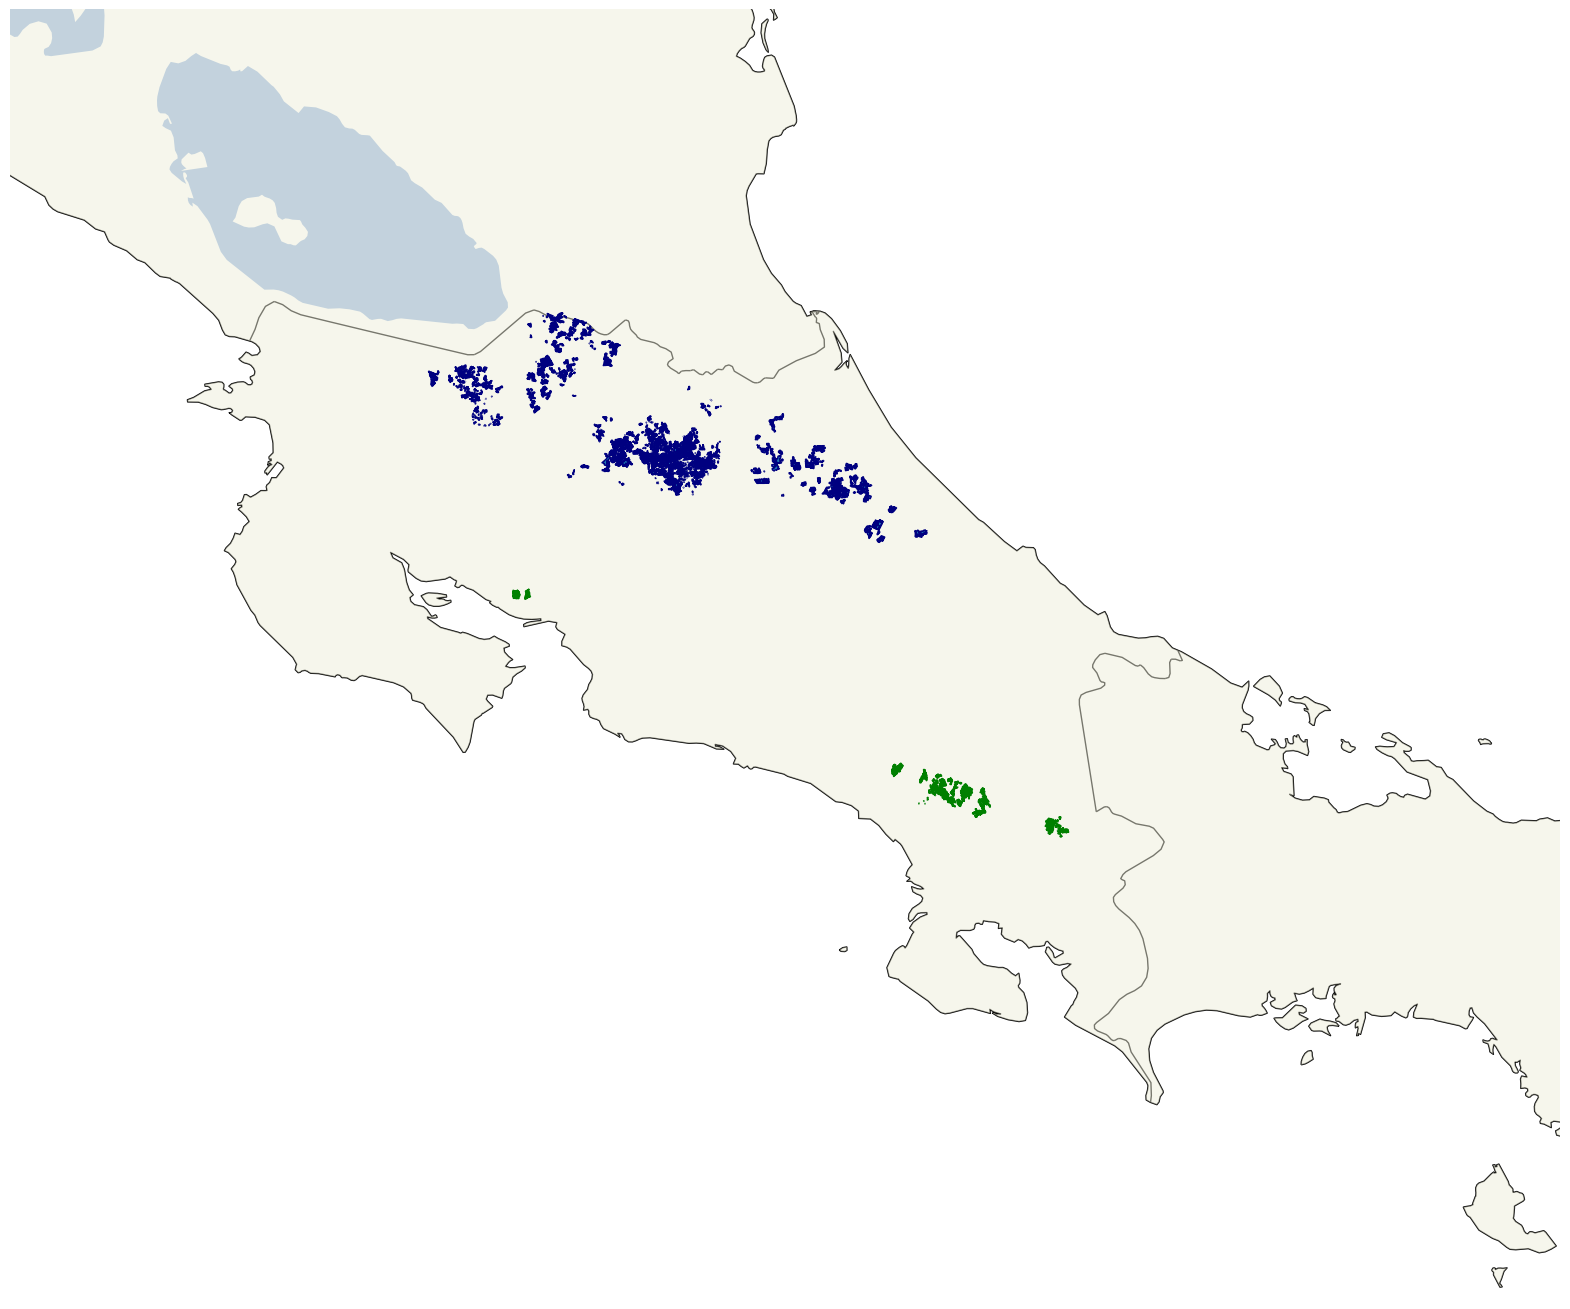

In [23]:
bounds= pineFields.total_bounds
figure = plt.figure(figsize=(20,20))
ax = plt.axes(projection = ccrs.LambertConformal(), frameon=False)

ax.set_extent([-86.5,-81.5, 7.8, 11.7])

ax.add_geometries(northPine.geometry, crs=ccrs.PlateCarree(), zorder=5, edgecolor='navy')
ax.add_geometries(westPine.geometry, crs=ccrs.PlateCarree(), zorder=5, edgecolor='green')
ax.add_geometries(southPine.geometry, crs=ccrs.PlateCarree(), zorder=5, edgecolor='green')

ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.LAKES)
#ax.add_feature(cf.OCEAN)
ax.add_feature(land)

ax = figure.add_subplot(projection = ccrs.LambertConformal(), frameon=False)

plt.savefig(os.path.join(output_path,'allCostaRicaPAL.pdf'), bbox_inches='tight')

In [ ]:
# To see the data in an html plot with data and pop-up with hectare info. It's heavy!

#solution from stack to use folium with html
#https://stackoverflow.com/questions/36969991/folium-map-not-displaying

    # class Map:
    #     def __init__(self, center, zoom_start):
    #         self.center = center
    #         self.zoom_start = zoom_start
        
    #     def showMap(self):
    #         #create basemap 
    #         my_map = folium.Map(location=[11, -83], zoom_start=10, tiles='CartoDB positron')
    #         # add polygons, solution from https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html
    #         for _, r in pineFields.iterrows():
    #             # Without simplifying the representation of each borough,
    #             # the map might not be displayed
    #             sim_geo = gpd.GeoSeries(r['geometry']) #.simplify(tolerance=0.001)
    #             geo_j = sim_geo.to_json()
    #             geo_j = folium.GeoJson(data=geo_j,
    #                                 style_function=lambda x: {'fillColor': 'orange'})
    #             geo_j.add_to(my_map)
            
    #         #add popup info with hectare info 
    #         for _, r in pineFields.iterrows():
    #             lat = r['centroid'].y
    #             lon = r['centroid'].x
    #             folium.Marker(location=[lat, lon],
    #                         popup='Area Ha: {}'.format(r['areaHa'])).add_to(my_map)

    #         #Display the map
    #         my_map.save("map.html")
    #         webbrowser.open("map.html")

In [ ]:
#Define coordinates of where we want to center our map
# coords = [11, -83]
# map = Map(center = coords, zoom_start = 13)
# map.showMap()